In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns # 另一個繪圖-樣式套件
mpl.rcParams['figure.dpi'] = 2000
# 忽略警告訊息
import warnings

warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

# 讀取檔案
f_app = os.path.join(dir_data, 'quoteDailyChange.csv')
print('Path of read in data: %s' % (f_app))
data = pd.read_csv(f_app)
#data['Multiply']= ''
data['Multiply'] = data['date'].map(lambda x: np.random.random())
data.head(30)

Path of read in data: ./data/quoteDailyChange.csv


,date,stockChange,dollarChange,Multiply
0,1985/11/21,0.000000,0.000000,0.232497
1,1985/11/22,0.054615,-0.729069,0.308613
2,1985/11/25,-0.580587,0.007897,0.168782
3,1985/11/26,0.159716,-0.371131,0.213325
4,1985/11/27,0.931876,-0.007926,0.603491
5,1985/11/29,-0.182678,-0.776791,0.745324
6,1985/12/2,-0.845818,0.319540,0.295536
7,1985/12/3,0.199538,0.366300,0.719885
8,1985/12/4,1.677783,-0.476039,0.850672
9,1985/12/5,-0.171371,0.063776,0.339078


In [3]:
for i in range(0,8336):
    data.iloc[i,3] = (data.iloc[i,1]*data.iloc[i,2])
print(data.tail(5))

            date  stockChange  dollarChange  Multiply
8331  2018/12/24    -2.711225     -0.464465  1.259270
8332  2018/12/26     4.959374      0.584332  2.897923
8333  2018/12/27     0.856268     -0.587151 -0.502759
8334  2018/12/28    -0.124158     -0.037500  0.004656
8335  2018/12/31     0.849248     -0.239671 -0.203540


In [4]:
positive = len(data['Multiply'][data.Multiply>0])
print(positive)

4224


In [5]:
negative = len(data['Multiply'][data.Multiply<0])
print(negative)

4042


In [6]:
neutral = len(data['Multiply'][data.Multiply==0])
print(neutral)

70


In [7]:
def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )

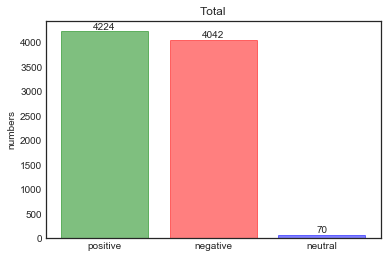

In [8]:
total_x=('positive','negative', 'neutral')
y_pos = np.arange(len(total_x))
value = [positive, negative, neutral]

A = plt.bar(y_pos, value, align='center', alpha=0.5)
plt.xticks(y_pos, total_x)
plt.ylabel('numbers')
plt.title('Total')

createLabels(A)
A[0].set_color('g')
A[1].set_color('r')
A[2].set_color('b')

plt.show()

In [9]:
# data['date'] = pd.to_datetime(data['date'])
# data.resample('Y', on='date', label='left', closed='left').sum().query('Multiply > 0')

In [10]:
data.head()

,date,stockChange,dollarChange,Multiply
0,1985/11/21,0.000000,0.000000,0.000000
1,1985/11/22,0.054615,-0.729069,-0.039818
2,1985/11/25,-0.580587,0.007897,-0.004585
3,1985/11/26,0.159716,-0.371131,-0.059276
4,1985/11/27,0.931876,-0.007926,-0.007386


In [11]:
data['date'] = pd.to_datetime(data['date'])
data_year = data.resample('AS', on='date')['Multiply'].agg(['count', 'mean', 'max'])

In [12]:
data_year.head()

,count,mean,max
date,,,
1985-01-01,27,-0.106114,0.216621
1986-01-01,251,-0.053562,2.941122
1987-01-01,252,0.300114,21.202663
1988-01-01,253,0.194257,8.740948
1989-01-01,252,0.030864,6.545732


In [13]:
data_year_po = data.query('Multiply > 0').resample('AS', on='date')['Multiply'].agg(['count', 'mean', 'max'])

In [14]:
data_year_po.head()

,count,mean,max
date,,,
1985-01-01,9,0.111210,0.216621
1986-01-01,116,0.368261,2.941122
1987-01-01,149,0.746310,21.202663
1988-01-01,141,0.530361,8.740948
1989-01-01,130,0.323841,6.545732


In [15]:
data_year_ne = data.query('Multiply < 0').resample('AS', on='date')['Multiply'].agg(['count', 'mean', 'max'])
data_year_ne.tail()

,count,mean,max
date,,,
2014-01-01,114,-0.102998,-0.000107
2015-01-01,121,-0.287624,-0.000725
2016-01-01,128,-0.250930,-0.000954
2017-01-01,108,-0.078240,-0.000785
2018-01-01,128,-0.275229,-0.000155


In [16]:
data_year_ne.head()
print(len(data_year_ne))

34


In [17]:
data_year_zero = data.query('Multiply == 0').resample('AS', on='date')['Multiply'].agg(['count', 'mean', 'max'])
data_year_zero.head()

,count,mean,max
date,,,
1985-01-01,1,0.0,0.0
1986-01-01,2,0.0,-0.0
1987-01-01,3,0.0,-0.0
1988-01-01,6,0.0,-0.0
1989-01-01,1,0.0,0.0


In [18]:
df_years = pd.DataFrame(columns=['year','positive','negative','neutral'])
df_years

,year,positive,negative,neutral


In [19]:
df_years['year'] = data_year.index.values
df_years['year'] = pd.DatetimeIndex(df_years['year']).year
for i in range(0,33):
    df_years.iloc[i,1] = (data_year_po.iloc[i,0])
    df_years.iloc[i,2] = (data_year_ne.iloc[i,0])
    df_years.iloc[i,3] = (data_year_zero.iloc[i,0])
df_years.iloc[33,1] = 123
df_years.iloc[33,2] = 128
df_years.iloc[33,3] = 0
df_years.tail(5)

,year,positive,negative,neutral
29,2014,138,114,0
30,2015,131,121,0
31,2016,124,128,0
32,2017,141,108,2
33,2018,123,128,0


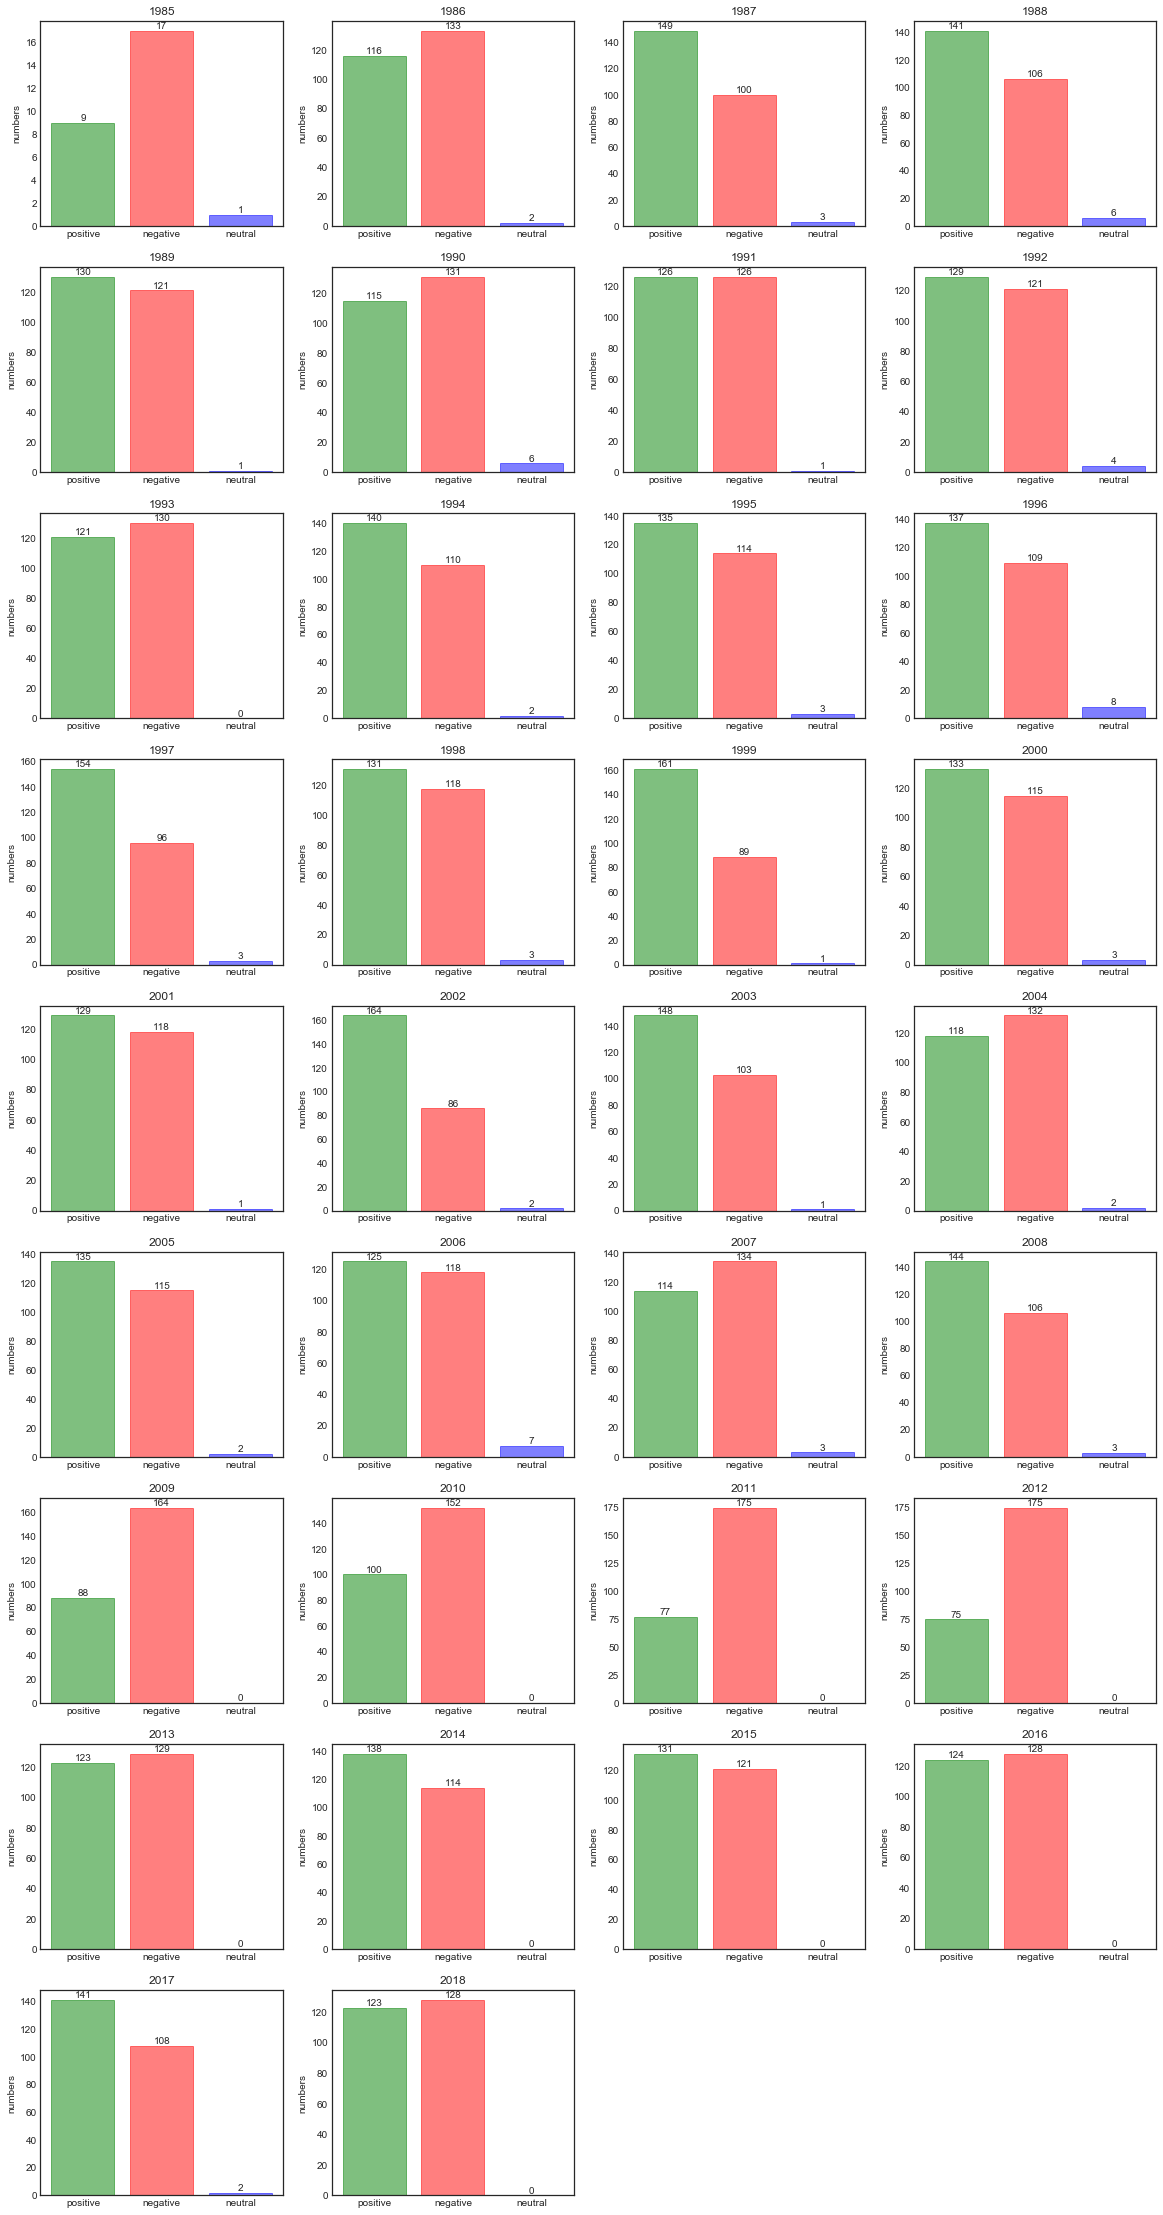

In [20]:
fig = plt.figure(figsize=(20,40))
for i in range(0,34):
    plt.subplot(9, 4, i+1)
    positive = df_years.iloc[i,1]
    negative = df_years.iloc[i,2]
    neutral = df_years.iloc[i,3]
    total_x=('positive','negative', 'neutral')
    y_pos = np.arange(len(total_x))
    value = [positive, negative, neutral]

    A = plt.bar(y_pos, value, align='center', alpha=0.5)
    plt.xticks(y_pos, total_x)
    plt.ylabel('numbers')
    plt.title(df_years.iloc[i,0])

    createLabels(A)
    A[0].set_color('g')
    A[1].set_color('r')
    A[2].set_color('b')
plt.show()

In [21]:
x = list()
for i in range(1985,2019):
    x.append(i)
print(x)

y = list()
for i in range(0,34):
    y.append(((df_years.iloc[i,1]-df_years.iloc[i,2])/(df_years.iloc[i,1]+df_years.iloc[i,2]+df_years.iloc[i,3]))/100)
print(y)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[-0.002962962962962963, -0.0006772908366533864, 0.0019444444444444444, 0.001383399209486166, 0.00035714285714285714, -0.0006349206349206349, 0.0, 0.00031496062992125983, -0.00035856573705179284, 0.0011904761904761904, 0.0008333333333333333, 0.0011023622047244095, 0.002292490118577075, 0.0005158730158730158, 0.0028685258964143427, 0.0007171314741035857, 0.0004435483870967742, 0.0030952380952380953, 0.0017857142857142857, -0.0005555555555555556, 0.0007936507936507937, 0.00028000000000000003, -0.0007968127490039841, 0.00150197628458498, -0.0030158730158730157, -0.0020634920634920633, -0.0038888888888888888, -0.004, -0.0002380952380952381, 0.0009523809523809524, 0.0003968253968253968, -0.00015873015873015873, 0.0013147410358565737, -0.00019920318725099602]


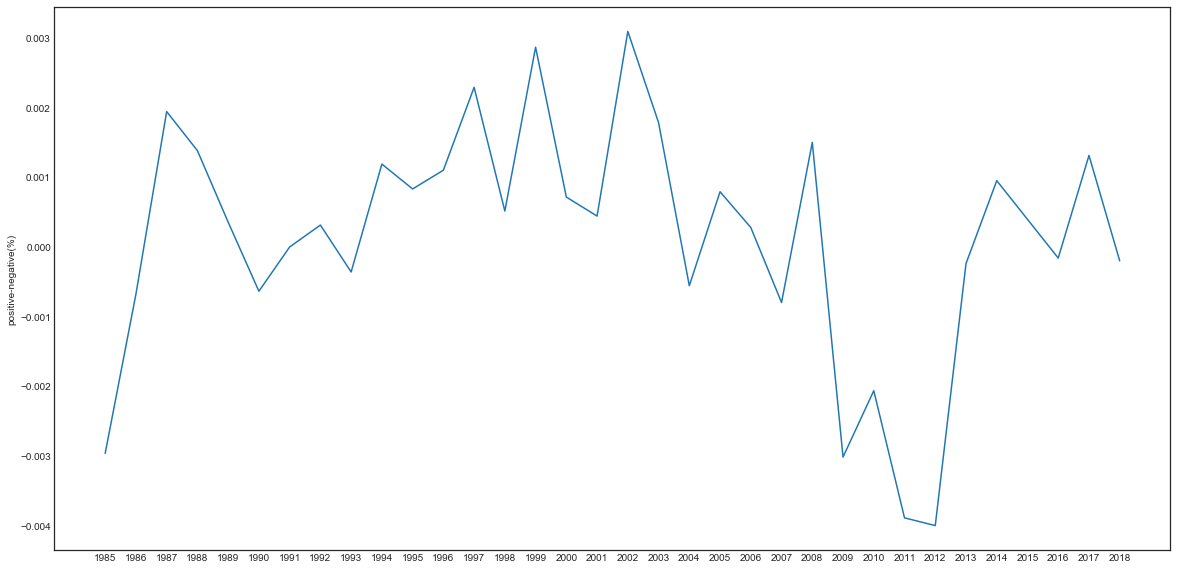

In [22]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(len(x)), y)
ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x)
plt.ylabel('positive-negative(%)')
plt.show()